<a href="https://colab.research.google.com/github/BrunoPTeruya/Portfolio/blob/master/Voos_Bruno_Teruya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**
Queremos prever se os voos da base irão atrasar. Nosso alvo é então a coluna ARR_DEL15. No Kaggle essa coluna é descrita como: Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

https://www.kaggle.com/divyansh22/flight-delay-prediction

Usaremos a base de 2019 para fazer o modelo. Ao final vamos ver como ele se comporta com a base de 2020

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [61]:
df = pd.read_csv('Jan_2019_ontime.csv')

# Análise da base

In [62]:
df.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,13487,1348702,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,10397,1039707,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,11193,1119302,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,12953,1295304,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,10685,1068502,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [63]:
df.tail()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,12173,1217305,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,14955,1495503,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,12016,1201602,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,12016,1201602,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN
583984,31,4,UA,19977,UA,N39726,104,12016,1201602,GUM,14955,1495503,SPN,1636.0,0.0,1600-1659,1719.0,0.0,0.0,0.0,129.0,NaN


In [64]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


Alumas colunas possuem valores numéricos mas vamos transformá-las já que não representam grandeza. São na verdade nomes

In [65]:
l = ['OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID']

In [66]:
for n in range(len(l)):
    df[l[n]] = df[l[n]].astype(str)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  object 
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  object 
 7   ORIGIN_AIRPORT_ID      583985 non-null  object 
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  object 
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  object 
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  object 
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [68]:
df.DEP_TIME_BLK.nunique()

19

In [69]:
# O DEP_TIME_BLK tem 19 valore únicos e deveria ter 24
# Entre meia noite e 6 da manhã há um bloco, o 0001-0559.
df.DEP_TIME_BLK.unique()

array(['0600-0659', '1400-1459', '1200-1259', '1500-1559', '1900-1959',
       '0900-0959', '1000-1059', '2000-2059', '1300-1359', '1100-1159',
       '0800-0859', '2200-2259', '1600-1659', '1700-1759', '2100-2159',
       '0700-0759', '1800-1859', '0001-0559', '2300-2359'], dtype=object)

In [70]:
df[(df.DEP_TIME < 500) & (df.DEP_TIME > 0)][['DEP_TIME', 'DEP_TIME_BLK']].head(10)

#Os horários que saem entre meia noite e 6 de manhã estão classificados ou como 0001-0559 
# ou 0600-0659 ou 2300-2359 na coluna DEP_TIME_BLK. É um pouco confuso

,DEP_TIME,DEP_TIME_BLK
260,107.0,0001-0559
399,306.0,0001-0559
468,3.0,2300-2359
927,1.0,2300-2359
1079,148.0,2300-2359
1112,204.0,2300-2359
1117,16.0,2300-2359
1125,7.0,2300-2359
1212,15.0,2300-2359
1280,17.0,2100-2159


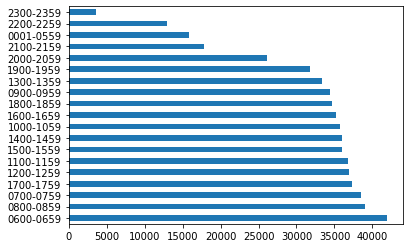

In [71]:
df.DEP_TIME_BLK.value_counts().plot(kind='barh')

Mesmo concentrando os voos de madrugada, o bloco 0001-0559 é o teceiro com menor número de voos
Já no bloco 0600-0659 pode haver influência dos voos de madrugada

In [72]:
'''ORIGIN_AIRPORT_ID, DEST_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID e DEST_AIRPORT_SEQ_ID são colunas que trazem a mesma informação
que as colunas ORIGIN e DEST. Iremos removê-las. 
O DEP_TIME_BLK e o DEP_TIME representam o horário de partida. O formato do DEP_TIME_BLK está mais favorável.
Vamos remover o DEP_TIME.'''

df.drop(columns=['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
                 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME'], inplace=True)

A coluna ARR_TIME tem uma representação muito difícil de trabalhar. Para mostrar a hora dessa forma retira-se os dois pontos entre as horas e os minutos, por exemplo, 15:00 é representado por 1500, 24:00 fica 2400 e 00:01 por 1. Note que meia noite e um e meia noite tem uma diferença de 2399 e são praticamente o mesmo horário. É por isso que ela também será removida.

In [73]:
df.drop(columns=['ARR_TIME'], inplace=True)

In [74]:
# A coluna Unnamed: 21 não tem nenhuma informação por isso podemos removê-la
df.drop(columns=['Unnamed: 21'], inplace=True)

In [75]:
df.corr()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
DAY_OF_MONTH,1.000000,-0.031008,0.027989,0.038639,0.114638,0.001380,-0.020388
DAY_OF_WEEK,-0.031008,1.000000,-0.003223,-0.000655,-0.007829,0.000606,0.018932
DEP_DEL15,0.027989,-0.003223,1.000000,0.719430,0.021686,0.020641,0.011619
ARR_DEL15,0.038639,-0.000655,0.719430,1.000000,NaN,NaN,0.003407
CANCELLED,0.114638,-0.007829,0.021686,NaN,1.000000,-0.008098,-0.049347
DIVERTED,0.001380,0.000606,0.020641,NaN,-0.008098,1.000000,0.012513
DISTANCE,-0.020388,0.018932,0.011619,0.003407,-0.049347,0.012513,1.000000


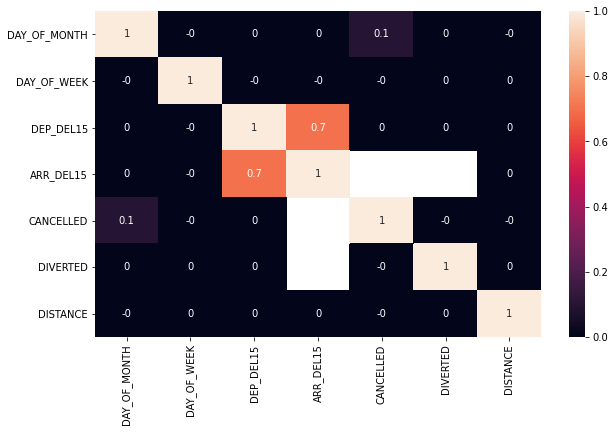

In [76]:
plt.figure(figsize=(10, 6))
vg_corr = df.corr().round(1)
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

Não percebemos nenhuma correlação muito forte com o ARR_DEL15 exceto pelo DEP_DEL15 (0,7). Se o voo já saiu com atraso, aumenta a possibilidade de ele chegar com atraso.

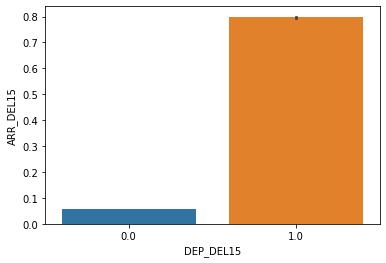

In [77]:
sns.barplot(df['DEP_DEL15'], df['ARR_DEL15'])

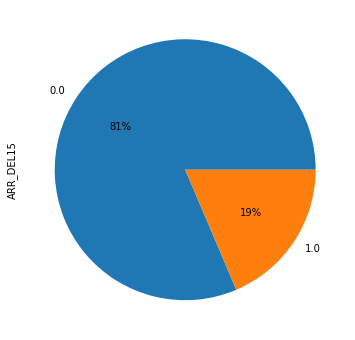

In [78]:
# Nosso target é o ARR_DEL15. Vamos verificar a proporção de voos atrasados e não atrasados
plt.figure(figsize=(10,6))
df['ARR_DEL15'].value_counts().plot(kind='pie', autopct='%1.0f%%')

É uma base desbalenceada! Mais para frente ajustaremos isso.

In [79]:
df.nunique()
# Quantidade de variáveis distintas em cada coluna

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5446
OP_CARRIER_FL_NUM        6839
ORIGIN                    346
DEST                      346
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_DEL15                   2
CANCELLED                   2
DIVERTED                    2
DISTANCE                 1451
dtype: int64

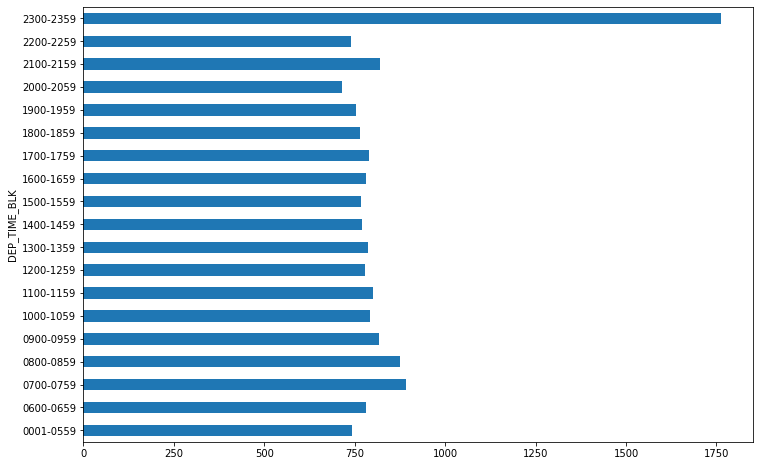

In [80]:
plt.figure(figsize=(12,8))
df.groupby(['DEP_TIME_BLK']).mean()['DISTANCE'].plot(kind='barh')

Entre 23h e 24h vemos que há voos mais longos

{'boxes': [<matplotlib.lines.Line2D at 0x7fb566b45b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb566b52550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb566b52fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb566b52c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb566b45e10>,
  <matplotlib.lines.Line2D at 0x7fb566b521d0>]}

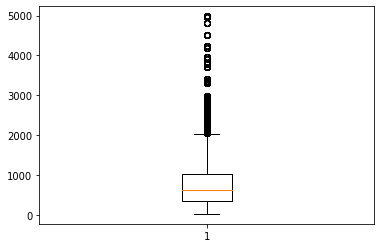

In [81]:
plt.boxplot(df.DISTANCE)
# Não podemos considerar outliers nesse caso já que há voos para o Havaí

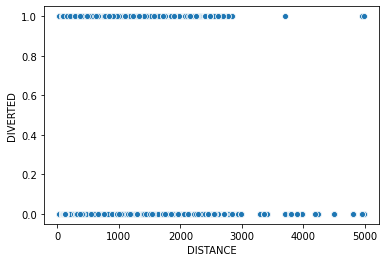

In [82]:
sns.scatterplot(y='DIVERTED', x='DISTANCE', data=df)

Percebe-se um número menor de voos desviados quando a distância é maior que 3000 milhas, casos do Havaí e do Alasca. Faz sentido já que são áreas com menor número de aeroportos.

TAIL_NUM e OP_CARRIER_FL_NUM possuem muitos valores distintos. Um representa a número na cauda do avião e o outro o número do voo. Tentei encontrar alguma lógica por trás do número de voo mas cada companhia determina esse número. Fazer dummies ou aplicar label encoder vai trazer dificuladades e distorções para trabalharmos. Vamos então removê-las

In [83]:
df.drop(columns=['TAIL_NUM', 'OP_CARRIER_FL_NUM'], inplace=True)

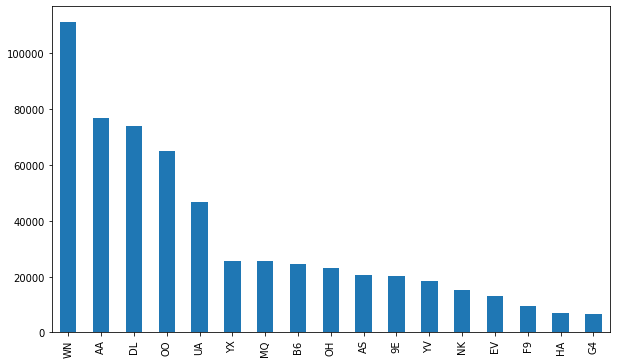

In [84]:
plt.figure(figsize=(10,6))
df.OP_UNIQUE_CARRIER.value_counts().plot(kind='bar')

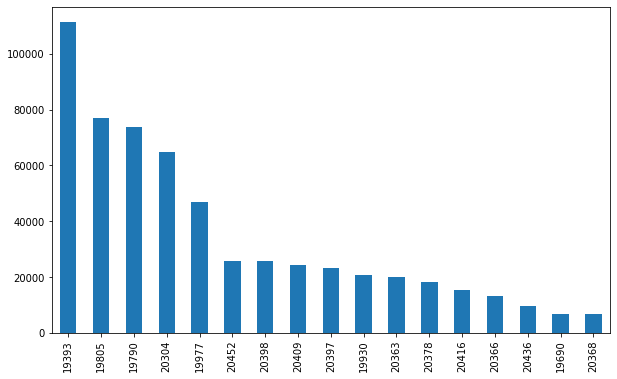

In [85]:
plt.figure(figsize=(10,6))
df.OP_CARRIER_AIRLINE_ID.value_counts().plot(kind='bar')

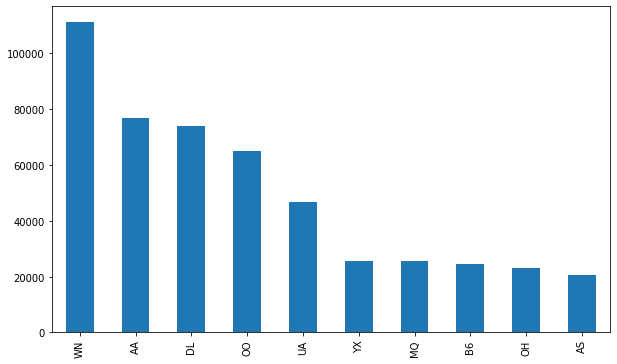

In [86]:
plt.figure(figsize=(10,6))
df.OP_CARRIER.value_counts().head(10).plot(kind='bar')

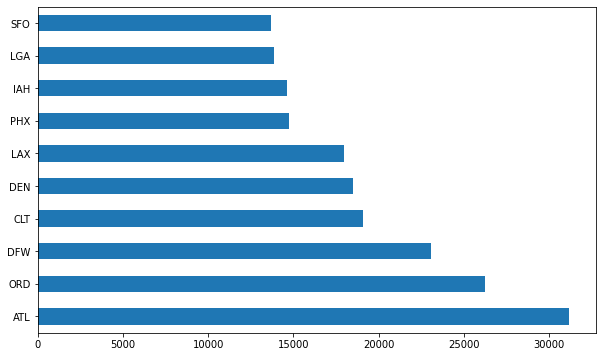

In [87]:
plt.figure(figsize=(10,6))
df.ORIGIN.value_counts().head(10).plot(kind='barh')
# top 10 origens

Top 10:
* Atlanta
* Chicago
* Dallas
* Charlotte
* Denver
* Los Angeles
* Phoenix
* Houston
* New York
* San Francisco

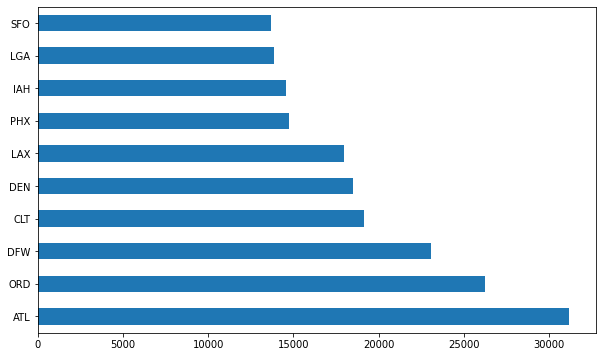

In [88]:
plt.figure(figsize=(10,6))
df.DEST.value_counts().head(10).plot(kind='barh')
# top 10 destinos

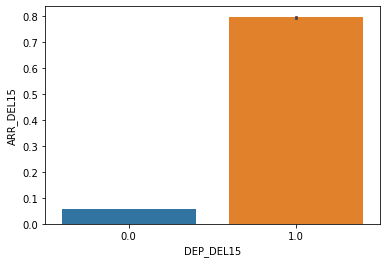

In [89]:
sns.barplot(df['DEP_DEL15'], df['ARR_DEL15'])

# Tratando valores nulos

In [90]:
df.isnull().sum()
# Observamos algumas colunas com valores faltantes

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
ORIGIN                       0
DEST                         0
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

Não faz sentido substituir valores faltantes do nosso target, DEP_DEL15. Isso pode enviesar o modelo. Vamos eliminar essas linhas

In [91]:
df = df.dropna(subset=['ARR_DEL15'])

In [92]:
df.isnull().sum()
# Removendo os nulos do nosso target, já conseguimos eliminar todos os nulos da base

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
ORIGIN                   0
DEST                     0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [93]:
df.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
ORIGIN                    346
DEST                      346
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1451
dtype: int64

# Seleção de Variáveis

Para fazermos a seleção das variáveis iremos usar Chi2, RFE e Random Forest. A paritir dessas análises, tomaremos somente as colunas que forem escolhidas em pelo menos dois desses algoritmos.

In [94]:
from sklearn.preprocessing import LabelEncoder
# Usamos LabelEncoder para tornar as variáveis categóticas em numéricas para posteriormente aplicar técnicas de Machine Learning

In [95]:
label = LabelEncoder()

In [96]:
df.OP_UNIQUE_CARRIER = label.fit_transform(df.OP_UNIQUE_CARRIER)
 
df.OP_CARRIER_AIRLINE_ID = label.fit_transform(df.OP_CARRIER_AIRLINE_ID)

df.OP_CARRIER = label.fit_transform(df.OP_CARRIER)

df.ORIGIN = label.fit_transform(df.ORIGIN)

df.DEST = label.fit_transform(df.DEST)

df.DEP_TIME_BLK = label.fit_transform(df.DEP_TIME_BLK)

In [97]:
X = df.drop(columns=['ARR_DEL15'])
y = df.ARR_DEL15

## Chi2

In [98]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [99]:
X_norm = MinMaxScaler().fit_transform(X)

In [100]:
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_norm, y)

chi2_support = chi2_selector.get_support()

chi2_feature = X.loc[: ,chi2_support].columns.tolist()
print(str(len(chi2_feature)), 'variáveis selecionadas:')
print(str(chi2_feature))

10 variáveis selecionadas:
['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE']


## RFE

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [102]:
rfe_selector = RFE(estimator=LogisticRegression(), step=2)
rfe_selector.fit(X, y)

rfe_support = rfe_selector.get_support()

rfe_feature = X.loc[: ,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'variáveis selecionadas:')
print(str(rfe_feature))

6 variáveis selecionadas:
['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'DEP_DEL15']


## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [104]:
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=10, criterion='entropy'))
rf_selector.fit(X, y)

rf_support = rf_selector.get_support()

rf_feature = X.loc[: ,rf_support].columns.tolist()
print(str(len(rf_feature)), 'variáveis selecionadas:')
print(str(rf_feature))

6 variáveis selecionadas:
['DAY_OF_MONTH', 'ORIGIN', 'DEST', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE']


In [105]:
feature_selection_df = pd.DataFrame({'Variáveis': X.columns,
                                 'chi2': chi2_support,
                                 'RFE': rfe_support,
                                 'Random Forest': rf_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total', 'Variáveis'], ascending=False)
feature_selection_df.head(15)

,Variáveis,chi2,RFE,Random Forest,Total
7,DEP_DEL15,True,True,True,3
0,DAY_OF_MONTH,True,True,True,3
5,ORIGIN,True,False,True,2
2,OP_UNIQUE_CARRIER,True,True,False,2
3,OP_CARRIER_AIRLINE_ID,True,True,False,2
4,OP_CARRIER,True,True,False,2
11,DISTANCE,True,False,True,2
6,DEST,True,False,True,2
8,DEP_TIME_BLK,True,False,True,2
1,DAY_OF_WEEK,True,True,False,2


In [106]:
# Tomaremos as colunas que aparecem 2 ou 3 vezes de acordo com os algoritmos acima
my_features = feature_selection_df[(feature_selection_df.Total == 3) | (feature_selection_df.Total == 2)]['Variáveis'].to_list()
len(my_features)

10

In [107]:
print(my_features)

['DEP_DEL15', 'DAY_OF_MONTH', 'ORIGIN', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'DISTANCE', 'DEST', 'DEP_TIME_BLK', 'DAY_OF_WEEK']


In [108]:
expl = df[my_features]

In [192]:
expl.head()

,DEP_DEL15,DAY_OF_MONTH,ORIGIN,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,DISTANCE,DEST,DEP_TIME_BLK,DAY_OF_WEEK
0,0.0,1,128,0,7,0,300.0,19,1,2
1,0.0,1,225,0,7,0,596.0,80,9,2
2,0.0,1,95,0,7,0,229.0,80,7,2
3,0.0,1,325,0,7,0,223.0,19,10,2
4,0.0,1,19,0,7,0,579.0,120,14,2


In [109]:
# Dividimos aleatoriamente as bases em treino e teste. Com a base de treino fazemos modelos e com as base de teste verificamos qual teve o melhor desempenho de acordo com a métrica demandada.
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(expl, y, random_state=42)

In [111]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((424472, 10), (141491, 10), (424472,), (141491,))

# Análises

Iremos usar 5 algoritmos diferentes:
* Regressão Logística
* Árvore de Decisão
* Random Forest
* Naive Bayes
* GBT Classifier

Tomaremos os dois melhores resultados usando a métrica Recall e então usaremos o GridSearch para ajustar os hiperparâmetros

In [112]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

## Regressão Logística

In [113]:
rl = LogisticRegression()

In [114]:
modelo_rl = rl.fit(X_train, y_train)

In [115]:
y_pred_rl_test = modelo_rl.predict(X_test)
y_pred_rl_train = modelo_rl.predict(X_train)

In [116]:
print(classification_report(y_test, y_pred_rl_test))
print(confusion_matrix(y_test, y_pred_rl_test))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    115126
         1.0       0.77      0.35      0.48     26365

    accuracy                           0.86    141491
   macro avg       0.82      0.66      0.70    141491
weighted avg       0.85      0.86      0.84    141491

[[112338   2788]
 [ 17143   9222]]


In [117]:
print(round(accuracy_score(y_test, y_pred_rl_test), 2))
print(round(accuracy_score(y_train, y_pred_rl_train), 2))

0.86
0.86


### Over e undersampling

Vamos fazer over e undersampling no nosso target para verificar se as métricas ficam melhores. 

In [147]:
from imblearn.combine import SMOTEENN

smte = SMOTEENN(random_state=42)

X_train2, y_train2 = smte.fit_resample(X_train, y_train)

In [149]:
X_train2.shape, y_train2.shape

((431580, 10), (431580,))

### RL Balanceada

In [150]:
modelo_rl2 = rl.fit(X_train2, y_train2)

In [151]:
y_pred_rl2_test = modelo_rl2.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred_rl2_test))
print(confusion_matrix(y_test, y_pred_rl2_test))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87    115126
         1.0       0.47      0.78      0.59     26365

    accuracy                           0.80    141491
   macro avg       0.71      0.79      0.73    141491
weighted avg       0.85      0.80      0.81    141491

[[92333 22793]
 [ 5842 20523]]


## Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt = DecisionTreeClassifier()

In [155]:
modelo_dt = dt.fit(X_train, y_train)

In [156]:
y_pred_dt_test = modelo_dt.predict(X_test)

In [157]:
print(classification_report(y_test, y_pred_dt_test))
print(confusion_matrix(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    115126
         1.0       0.63      0.65      0.64     26365

    accuracy                           0.86    141491
   macro avg       0.78      0.78      0.78    141491
weighted avg       0.87      0.86      0.87    141491

[[105073  10053]
 [  9145  17220]]


### DT Balanceado

In [158]:
modelo_dt2 = dt.fit(X_train2, y_train2)

In [159]:
y_pred_dt2_test = modelo_dt2.predict(X_test)

In [160]:
print(classification_report(y_test, y_pred_dt2_test))
print(confusion_matrix(y_test, y_pred_dt2_test))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91    115126
         1.0       0.60      0.69      0.64     26365

    accuracy                           0.86    141491
   macro avg       0.76      0.79      0.78    141491
weighted avg       0.87      0.86      0.86    141491

[[103093  12033]
 [  8103  18262]]


Aqui já percebemos uma melhora no Recall usando a base balanceada

## Random Forest

In [161]:
rf = RandomForestClassifier()

In [162]:
modelo_rf = rf.fit(X_train, y_train)

In [163]:
y_pred_rf_test = modelo_rf.predict(X_test)

In [164]:
print(classification_report(y_test, y_pred_rf_test))
print(confusion_matrix(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.72      0.76     26365

    accuracy                           0.91    141491
   macro avg       0.87      0.84      0.85    141491
weighted avg       0.91      0.91      0.91    141491

[[110402   4724]
 [  7364  19001]]


### RF Balanceada

In [165]:
modelo_rf2 = rf.fit(X_train2, y_train2)

y_pred_rf2_test = modelo_rf2.predict(X_test)

print(classification_report(y_test, y_pred_rf2_test))
print(confusion_matrix(y_test, y_pred_rf2_test))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    115126
         1.0       0.77      0.74      0.75     26365

    accuracy                           0.91    141491
   macro avg       0.85      0.85      0.85    141491
weighted avg       0.91      0.91      0.91    141491

[[109116   6010]
 [  6795  19570]]


## Naive Bayes

In [166]:
from sklearn.naive_bayes import GaussianNB

In [167]:
nb = GaussianNB()

modelo_nb = nb.fit(X_train, y_train)

y_pred_nb_test = modelo_nb.predict(X_test)

print(classification_report(y_test, y_pred_nb_test))
print(confusion_matrix(y_test, y_pred_nb_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.74      0.77     26365

    accuracy                           0.92    141491
   macro avg       0.87      0.85      0.86    141491
weighted avg       0.91      0.92      0.91    141491

[[110101   5025]
 [  6869  19496]]


### NB Balanceada

In [168]:
modelo_nb2 = nb.fit(X_train2, y_train2)

y_pred_nb2_test = modelo_nb2.predict(X_test)

print(classification_report(y_test, y_pred_nb2_test))
print(confusion_matrix(y_test, y_pred_nb2_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.74      0.77     26365

    accuracy                           0.92    141491
   macro avg       0.87      0.85      0.86    141491
weighted avg       0.91      0.92      0.91    141491

[[110101   5025]
 [  6869  19496]]


## GBT Classifier

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
gbt = GradientBoostingClassifier()

modelo_gbt = gbt.fit(X_train, y_train)

y_pred_gbt_test = modelo_gbt.predict(X_test)

print(classification_report(y_test, y_pred_gbt_test))
print(confusion_matrix(y_test, y_pred_gbt_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.74      0.77     26365

    accuracy                           0.92    141491
   macro avg       0.87      0.85      0.86    141491
weighted avg       0.91      0.92      0.91    141491

[[110108   5018]
 [  6872  19493]]


### GBT Balanceada

In [171]:
modelo_gbt2 = gbt.fit(X_train2, y_train2)

y_pred_gbt2_test = modelo_gbt2.predict(X_test)

print(classification_report(y_test, y_pred_gbt2_test))
print(confusion_matrix(y_test, y_pred_gbt2_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.74      0.77     26365

    accuracy                           0.92    141491
   macro avg       0.87      0.85      0.86    141491
weighted avg       0.91      0.92      0.91    141491

[[110101   5025]
 [  6869  19496]]


In [172]:
recall = {'Algoritmos': ['RL','DT','RF','NB', 'GBT'],
          'Recall': [recall_score(y_test, y_pred_rl_test, average='weighted'),
                     recall_score(y_test, y_pred_dt_test, average='weighted'),
                     recall_score(y_test, y_pred_rf_test, average='weighted'),
                     recall_score(y_test, y_pred_nb_test, average='weighted'),
                     recall_score(y_test, y_pred_gbt_test, average='weighted')],
         'Recall Balanceado': [recall_score(y_test, y_pred_rl2_test, average='weighted'),
                              recall_score(y_test, y_pred_dt2_test, average='weighted'),
                              recall_score(y_test, y_pred_rf2_test, average='weighted'),
                              recall_score(y_test, y_pred_nb2_test, average='weighted'),
                              recall_score(y_test, y_pred_gbt2_test, average='weighted')]}

df_rec = pd.DataFrame(recall, columns = ['Algoritmos', 'Recall', 'Recall Balanceado'])

print (df_rec)

  Algoritmos    Recall  Recall Balanceado
0         RL  0.859136           0.797620
1         DT  0.864316           0.857687
2         RF  0.914567           0.909500
3         NB  0.915938           0.915938
4        GBT  0.915966           0.915938


Após testar os 5 algoritmos percebemos que o melhor Recall do Random Forest, Naive Bayes e GBT são muito próximos uns dos outros. Vamos usar o Random Forest para o modelo final.

## GridSearch

In [173]:
# Com o GridSearchCV podemos testar qual a melhor combinação de Hyperparâmetros para os respectivos algoritmos
from sklearn.model_selection import GridSearchCV

### GridSearch rf

In [176]:
param_grid_rf = {'n_estimators': [10, 50, 100, 200],
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

grid_rf = GridSearchCV(estimator=modelo_rf2, param_grid=param_grid_rf, scoring='recall', cv=4)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [177]:
y_pred_grid_rf_test = grid_rf.predict(X_test)

print(classification_report(y_test, y_pred_grid_rf_test))
print(confusion_matrix(y_test, y_pred_grid_rf_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.72      0.76     26365

    accuracy                           0.92    141491
   macro avg       0.87      0.84      0.85    141491
weighted avg       0.91      0.92      0.91    141491

[[110406   4720]
 [  7271  19094]]


A melhora não foi muito significativa nesse caso. De toda forma, iremos usar o modelo ajustado.

In [178]:
grid_rf.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 200}

In [179]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
final_rf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
                            
modelo_final = final_rf.fit(X_train2, y_train2)
                               
# Estamos usando o modelo escolhido para treinar a base e depois puxar os pesos dos coeficientes.
# O modelo do gridsearch não tem essa função

In [182]:
# Criamos um Dataframe com os pesos
coef = pd.DataFrame(modelo_final.feature_importances_, X_train.columns, columns=['Coefs'])
coef

,Coefs
DEP_DEL15,0.600685
DAY_OF_MONTH,0.061300
ORIGIN,0.051458
OP_UNIQUE_CARRIER,0.010780
OP_CARRIER_AIRLINE_ID,0.025303
OP_CARRIER,0.011028
DISTANCE,0.059956
DEST,0.048070
DEP_TIME_BLK,0.069632
DAY_OF_WEEK,0.061788


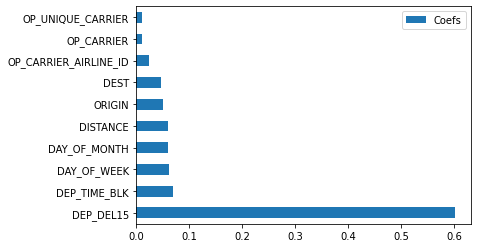

In [183]:
coef.sort_values('Coefs', ascending=False).plot(kind='barh')

Notamos que o DEP_DEL15 tem grande importância para determinar se o pouso terá atraso. Vimos isso quando fizemos a correlação entre as variáveis. Seria interessante saber, portanto, quais as causas para o atraso da decolagem. 

Alguns motivos possíveis para atraso:
* Conexões podem causar atraso. Se um passageiro com conexão aterrissa atrasado o próximo voo dele também atrasará
* Aeroportos com controle mais rígido podem checar bagagens de passageiros já embarcados. Esse passageiro terá de ser retirado da aeronave
* O clima desvaforece a segurança tanto na decolagem como na aterrissagem. O mês de janeiro é um mês frio nos EUA e a neve pode interferir, principalmente nos estados mais ao norte. 
* Manutenções corretivas (aquelas feitas quando já há algo defeituoso) podem ser detectadas nas vistorias. As corretivas são as mais problemátias já que uma peça com defeito pode sobrecarregar outras, sendo necessárioa uma checagem mais minuciosa

# Para finalizar vamos verificar se o modelo de 2019 é bom para 2020

In [211]:
df20 = pd.read_csv('Jan_2020_ontime.csv')

In [212]:
df20.drop(columns=['Unnamed: 21'], inplace=True)

In [213]:
df20 = df20.dropna()

In [214]:
df20.OP_UNIQUE_CARRIER = label.fit_transform(df20.OP_UNIQUE_CARRIER)
 
df20.OP_CARRIER_AIRLINE_ID = label.fit_transform(df20.OP_CARRIER_AIRLINE_ID)

df20.OP_CARRIER = label.fit_transform(df20.OP_CARRIER)

df20.ORIGIN = label.fit_transform(df20.ORIGIN)

df20.DEST = label.fit_transform(df20.DEST)

df20.DEP_TIME_BLK = label.fit_transform(df20.DEP_TIME_BLK)

In [215]:
X = df20[my_features]
y = df20['ARR_DEL15']

In [217]:
y_pred_final = modelo_final.predict(X)

print(classification_report(y, y_pred_final))
print(confusion_matrix(y, y_pred_final))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92    516983
         1.0       0.53      0.73      0.62     82285

    accuracy                           0.87    599268
   macro avg       0.74      0.81      0.77    599268
weighted avg       0.90      0.87      0.88    599268

[[463816  53167]
 [ 22081  60204]]


In [218]:
print(classification_report(y_test, y_pred_grid_rf_test))
print(confusion_matrix(y_test, y_pred_grid_rf_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    115126
         1.0       0.80      0.72      0.76     26365

    accuracy                           0.92    141491
   macro avg       0.87      0.84      0.85    141491
weighted avg       0.91      0.92      0.91    141491

[[110406   4720]
 [  7271  19094]]


Comparando os dois resultados vemos que as métricas são piores para 2020 mas ainda com um bom aproveitamento. Provavelmente para 2021 ainda piores. É importante analisar e aprimorar os modelos conforme o temos mais dados.